## Challenge Set 8
Topic: Decision Trees  
Date: 08/06/2016  
Name: Adam Levin  
Worked with: None

**Challenge 1**

In [99]:
import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np

In [100]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18171  100 18171    0     0  38570      0 --:--:-- --:--:-- --:--:-- 38661


In [101]:
data = pd.read_csv('data.csv',header=None)
data = data.replace('n',0)
data = data.replace('y',1)
data = data.replace('?',np.nan)
data = data.fillna(data.mean())

In [102]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.362319,1.0,1.0,1.0,0.0,1.000000
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.812689


In [103]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(data.loc[:,1:16], data.loc[:,0])

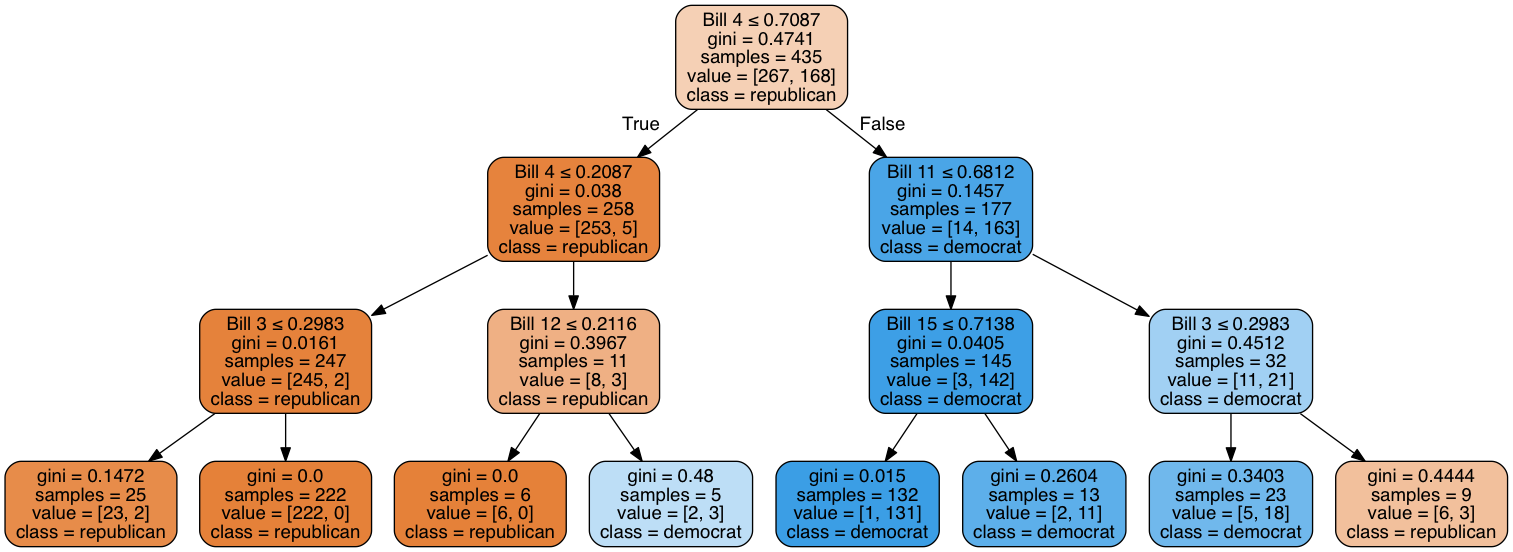

In [104]:
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,  
                     feature_names=['Bill %d' % i for i in range(1,17)],
                     class_names=['republican','democrat'],
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Challenge 2**

In [105]:
data = pd.read_csv('./../../../../projects/02-luther/test.csv').drop(['Retweets','Likes','Text'],axis=1)

In [106]:
data.head(2)

,title,days from today,opening_wknd,opening_date,Num_Tweets,Total_Retweets,Median_Retweets,Mean_Retweets,Trimmed_Mean_Retweets,90th_Percentile_Retweets,95th_Percentile_Retweets,98th_Percentile_Retweets,99th_Percentile_Retweets,99.5th_Percentile_Retweets,Max_Retweets,Total_Likes,Median_Likes,Mean_Likes,Trimmed_Mean_Likes,90th_Percentile_Likes,95th_Percentile_Likes,98th_Percentile_Likes,99th_Percentile_Likes,99.5th_Percentile_Likes,Max_Likes
0,Finding Dory,28,1.351484e+08,2016-06-17,3446,3549,0.0,1.029890,0.278165,3.0,5.0,7.0,8.0,9.0,9,9702,2.0,2.815438,2.330808,6.0,8.0,8.0,9.0,9.0,9
1,The Angry Birds Movie,56,3.822988e+07,2016-05-20,2710,987,0.0,0.364207,0.000000,1.0,2.0,5.0,7.0,8.0,9,2696,0.0,0.994834,0.249311,3.0,5.0,7.0,8.0,9.0,9


In [107]:
med = np.median(data.opening_wknd)
data.insert(0,'above_median_gross',[1 if gross>=med else 0 for gross in data.opening_wknd])

In [108]:
data.head(2)

,above_median_gross,title,days from today,opening_wknd,opening_date,Num_Tweets,Total_Retweets,Median_Retweets,Mean_Retweets,Trimmed_Mean_Retweets,90th_Percentile_Retweets,95th_Percentile_Retweets,98th_Percentile_Retweets,99th_Percentile_Retweets,99.5th_Percentile_Retweets,Max_Retweets,Total_Likes,Median_Likes,Mean_Likes,Trimmed_Mean_Likes,90th_Percentile_Likes,95th_Percentile_Likes,98th_Percentile_Likes,99th_Percentile_Likes,99.5th_Percentile_Likes,Max_Likes
0,1,Finding Dory,28,1.351484e+08,2016-06-17,3446,3549,0.0,1.029890,0.278165,3.0,5.0,7.0,8.0,9.0,9,9702,2.0,2.815438,2.330808,6.0,8.0,8.0,9.0,9.0,9
1,1,The Angry Birds Movie,56,3.822988e+07,2016-05-20,2710,987,0.0,0.364207,0.000000,1.0,2.0,5.0,7.0,8.0,9,2696,0.0,0.994834,0.249311,3.0,5.0,7.0,8.0,9.0,9


In [109]:
clf.fit(data.iloc[:,5:],data.iloc[:,0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

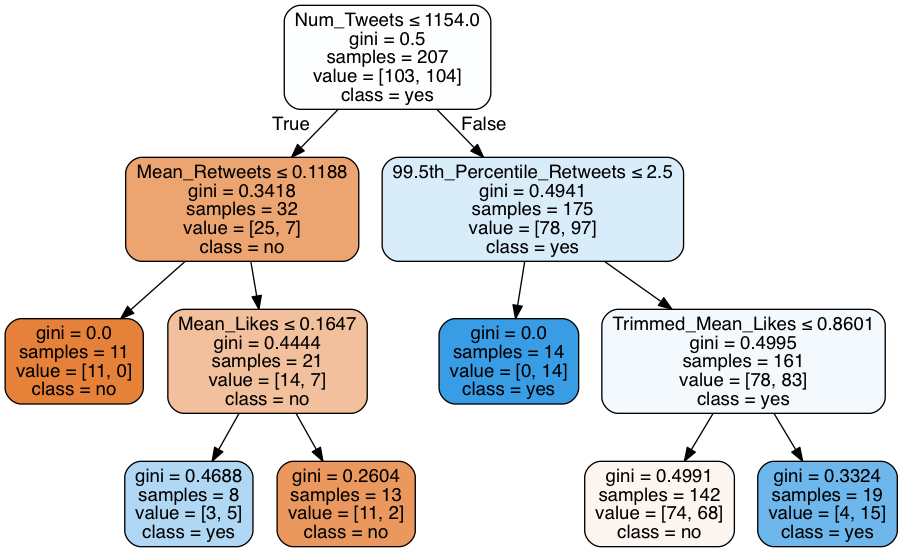

In [110]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,  
                     feature_names=data.columns[5:].tolist(),
                     class_names=['no','yes'],
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Challenge 3**

In [111]:
data = pd.read_csv('./../../../challenges_data/titanic_train.csv')

In [112]:
data.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


Too many nulls in cabin so I will drop it. Will impute null ages with the mean.

In [114]:
X = pd.get_dummies(data.loc[:,['pclass','sex','embarked','age','sibsp','parch','fare']])
X = X.fillna(X.mean())

In [115]:
X.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [116]:
clf.fit(X,data.iloc[:,0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

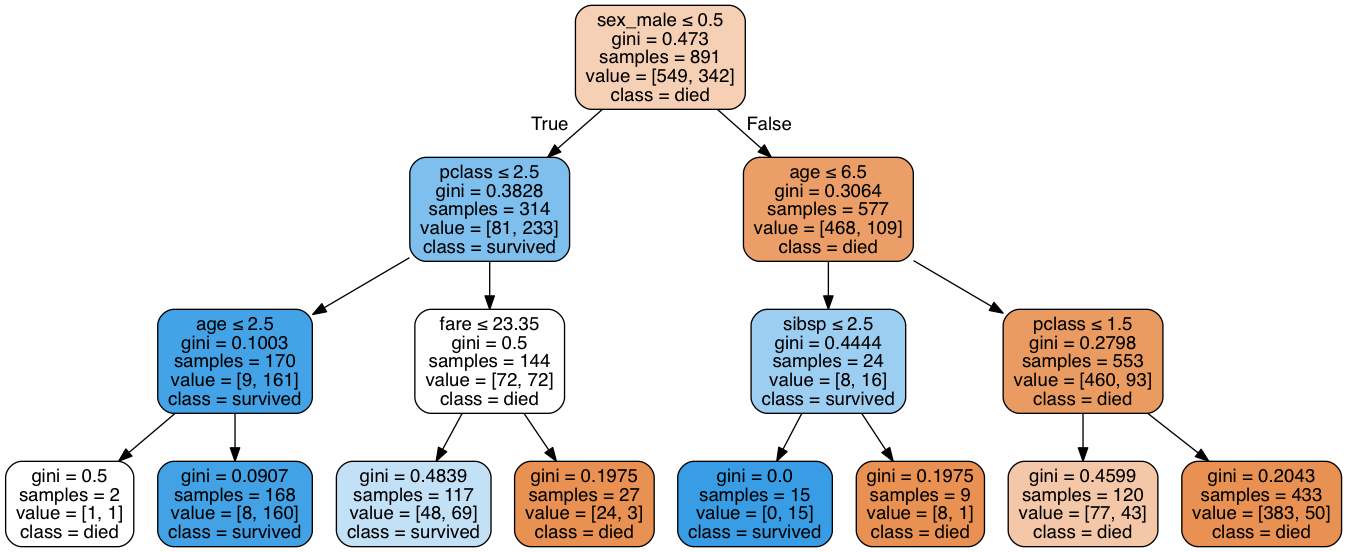

In [118]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,  
                     feature_names=X.columns.tolist(),
                     class_names=['died','survived'],
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())